In [1]:
import numpy as np
import pandas as pd
import scipy.stats

pd.options.mode.chained_assignment = None
from matplotlib import pyplot as plt, rcParams
# import cv2
import seaborn as sns

sns.set(style="white", context="paper")
from cycler import cycler
import os, sys
import glob
from datetime import datetime, timedelta
from itertools import combinations
import base64
from PIL import Image
from io import BytesIO as _BytesIO
import requests
import json
import pickle
from datetime import datetime
from IPython.display import display, Markdown, Latex
from matplotlib import dates
from sklearn.metrics import *
import collections
from copy import deepcopy
pd.options.display.max_columns = None
def printm(s): return display(Markdown(s))


In [2]:
# ! pip install --upgrade pandas
pd.__version__

'1.5.3'

## Get context results


In [3]:
df_extra_activities = pd.read_csv('/home/prasoon/context_sensing/cache/feb2023/extrasensory_activity_trace.csv')
df_extra_activities.head()

,timestamp,activities,id
0,1444079161,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
1,1444079221,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
2,1444079281,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
3,1444079341,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601
4,1444079431,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601


In [4]:
df_extra_activities.dtypes

timestamp      int64
activities    object
id            object
dtype: object

In [5]:
df_extra_context = pd.read_csv('/home/prasoon/context_sensing/cache/feb2023/extrasensory_5_1_TAE_trace.csv',index_col=0)
df_extra_context.timestamp = df_extra_context.timestamp.astype(int)
df_extra_context.info()
df_extra_context.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21777 entries, 0 to 21776
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                21777 non-null  object
 1   timestamp         21777 non-null  int64 
 2   gt_context        21777 non-null  object
 3   pred_context      21777 non-null  object
 4   combined_context  21777 non-null  object
dtypes: int64(1), object(4)
memory usage: 1020.8+ KB


,id,timestamp,gt_context,pred_context,combined_context
0,00EABED2-271D-49D8-B599-1D4A09240601,1444080632,OfficeWork,"Amusement,Commuting,OfficeWork","Amusement,Commuting,OfficeWork,Unknown"
1,00EABED2-271D-49D8-B599-1D4A09240601,1444080692,OfficeWork,"Amusement,Commuting,OfficeWork","Amusement,Commuting,OfficeWork"
2,00EABED2-271D-49D8-B599-1D4A09240601,1444080752,OfficeWork,"Commuting,OfficeWork","Commuting,OfficeWork"
3,00EABED2-271D-49D8-B599-1D4A09240601,1444080812,OfficeWork,OfficeWork,OfficeWork
4,00EABED2-271D-49D8-B599-1D4A09240601,1444080872,OfficeWork,OfficeWork,OfficeWork


In [6]:
df_all = pd.merge(df_extra_activities, df_extra_context, on=['id','timestamp'],how='outer')
df_all.info()
df_all.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307534 entries, 0 to 307533
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   timestamp         307534 non-null  int64 
 1   activities        307534 non-null  object
 2   id                307534 non-null  object
 3   gt_context        21777 non-null   object
 4   pred_context      21777 non-null   object
 5   combined_context  21777 non-null   object
dtypes: int64(1), object(5)
memory usage: 16.4+ MB


,timestamp,activities,id,gt_context,pred_context,combined_context
0,1444079161,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601,NaN,NaN,NaN
1,1444079221,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601,NaN,NaN,NaN
2,1444079281,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601,NaN,NaN,NaN
3,1444079341,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601,NaN,NaN,NaN
4,1444079431,"Sitting,In a meeting,With co-workers",00EABED2-271D-49D8-B599-1D4A09240601,NaN,NaN,NaN


In [7]:
df_all['datetime'] = pd.to_datetime(df_all['timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)

In [8]:
df_all['date'] = df_all['datetime'].dt.date

In [9]:
df_all[~df_all.gt_context.isnull()][['id','date']].value_counts()

id                                    date      
0A986513-7828-4D53-AA1F-E02D6DF9561B  2015-12-10    1366
098A72A5-E3E5-4F54-A152-BBDA0DF7B694  2015-08-05    1287
0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  2015-12-02    1195
                                      2015-12-06    1152
                                      2015-12-03    1037
098A72A5-E3E5-4F54-A152-BBDA0DF7B694  2015-08-06    1013
0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  2015-12-01    1008
0A986513-7828-4D53-AA1F-E02D6DF9561B  2015-12-09    1006
0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  2015-12-04     898
1DBB0F6F-1F81-4A50-9DF4-CD62ACFA4842  2015-08-31     859
098A72A5-E3E5-4F54-A152-BBDA0DF7B694  2015-08-28     786
0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  2015-12-05     766
0A986513-7828-4D53-AA1F-E02D6DF9561B  2015-12-08     744
00EABED2-271D-49D8-B599-1D4A09240601  2015-10-06     714
0E6184E1-90C0-48EE-B25A-F1ECB7B9714E  2015-11-30     698
098A72A5-E3E5-4F54-A152-BBDA0DF7B694  2015-08-04     661
00EABED2-271D-49D8-B599-1D4A09240601  2

In [10]:
sample_id, sample_date = '0A986513-7828-4D53-AA1F-E02D6DF9561B','2015-12-10'
df_sample_data = df_all[(df_all.date.astype(str)==sample_date) & (df_all.id==sample_id)].sort_values(by='timestamp')
df_sample_data.info()
df_sample_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1402 entries, 9476 to 10877
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         1402 non-null   int64         
 1   activities        1402 non-null   object        
 2   id                1402 non-null   object        
 3   gt_context        1366 non-null   object        
 4   pred_context      1366 non-null   object        
 5   combined_context  1366 non-null   object        
 6   datetime          1402 non-null   datetime64[ns]
 7   date              1402 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 98.6+ KB


,timestamp,activities,id,gt_context,pred_context,combined_context,datetime,date
9476,1449734417,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,NaN,NaN,NaN,2015-12-10 00:00:17,2015-12-10
9477,1449734477,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,NaN,NaN,NaN,2015-12-10 00:01:17,2015-12-10
9478,1449734537,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,Sleeping,Sleeping,Sleeping,2015-12-10 00:02:17,2015-12-10
9479,1449734597,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,Sleeping,Sleeping,Sleeping,2015-12-10 00:03:17,2015-12-10
9480,1449734657,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,Sleeping,Sleeping,Sleeping,2015-12-10 00:04:17,2015-12-10


In [11]:
df_sample_data['gt_context'].unique()

array([nan, 'Sleeping', 'UsingBathroom', 'Amusement',
       'HavingMeal,Amusement', 'Relaxing', 'Commuting,Relaxing',
       'Commuting', 'HavingMeal,Amusement,Commuting',
       'Amusement,Commuting', 'Exercising,Amusement', 'Exercising',
       'UsingBathroom,Exercising'], dtype=object)

In [24]:
def get_date_plot(df_all, sample_id, sample_date):
    df_ts_id = df_all[(df_all.date.astype(str)==sample_date) & (df_all.id==sample_id)].sort_values(by='timestamp')
    df_ts_id = df_ts_id[~df_ts_id.gt_context.isnull()]
    all_activities = set()
    all_contexts = set()
    row_activity_sets = df_ts_id.activities.apply(lambda x: set(x.split(","))).values
    row_context_sets =  df_ts_id.apply(lambda row: set(row['gt_context'].split(",") + row['pred_context'].split(",")),axis=1).values
    for idx,_ in enumerate(row_context_sets):
        all_activities = all_activities.union(row_activity_sets[idx])
        all_contexts = all_contexts.union(row_context_sets[idx])
    try:
        all_activities.remove('Sleeping')
        all_activities.add('sleep')
    except:
        ...
    all_y = sorted(list(all_contexts)) + ['-----'] + sorted(list(all_activities))
    activities = [act_set.replace("Sleeping","sleep").split(",") for act_set in df_ts_id.activities.values.tolist()]
    timestamps = df_ts_id.timestamp.values.tolist()
    gt_contexts = [ctx_set.split(",") for ctx_set in df_ts_id.gt_context.values.tolist()]
    tp_contexts = [ctx_set.split(",") for ctx_set in df_ts_id.pred_context.values.tolist()]

    df_acts_id = df_ts_id[['timestamp','activities']]
    for activity in all_activities:
        if activity=='sleep':
            df_acts_id[activity] = df_acts_id.activities.apply(lambda x: 1 if ('Sleeping' in x.split(",")) else 0)
        else:
            df_acts_id[activity] = df_acts_id.activities.apply(lambda x: 1 if (activity in x.split(",")) else 0)

    df_acts_id = pd.melt(df_acts_id.drop('activities',axis=1),id_vars='timestamp',ignore_index=True)
    df_acts_id['type'] = 'Activity'

    df_gt_ctx = df_ts_id[['timestamp','gt_context']]
    for context in all_contexts:
        df_gt_ctx[context] = df_gt_ctx.gt_context.apply(lambda x: 1 if (context in x.split(",")) else 0)
    df_gt_ctx = pd.melt(df_gt_ctx.drop('gt_context',axis=1),id_vars='timestamp',ignore_index=True)
    df_gt_ctx['type'] = 'GroundTruth'

    df_tp_ctx = df_ts_id[['timestamp','pred_context']]
    for context in all_contexts:
        df_tp_ctx[context] = df_tp_ctx.pred_context.apply(lambda x: 1 if (context in x.split(",")) else 0)
    df_tp_ctx = pd.melt(df_tp_ctx.drop('pred_context',axis=1),id_vars='timestamp',ignore_index=True)
    df_tp_ctx['type'] = 'ContextPrediction'

    df_all_id = pd.concat([df_acts_id,df_gt_ctx,df_tp_ctx],ignore_index=True)
    df_all_id.columns= ['timestamp','label','value','type']
    df_all_id['datetime'] = pd.to_datetime(df_all_id['timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
    df_all_id = df_all_id[df_all_id.value==1]

    df_all_id['label'] = df_all_id['label'].apply(lambda x: all_y.index(x))
    df_all_id['date'] = df_all_id['datetime'].dt.date
    df_dates = df_all_id[['date']].drop_duplicates()
    df_all_id = df_all_id[['date', 'datetime', 'label','type']].sort_values(by=['datetime','type'])

    df_all_id.head()
    fig,ax = plt.subplots(1,1,figsize=(15,8))
    ax.axhline(y=all_y.index('-----'),color='k')
    ax.set_yticks(range(len(all_y)))
    ax.set_yticklabels(all_y,fontsize=15)
    ax.minorticks_on()
    ax.xaxis.set_major_formatter(dates.DateFormatter("%d/%m %H:%M"))
    sns.scatterplot(data=df_all_id,x='datetime',y='label',hue='type',style='type',size='type',markers=['o','^','v'],ax=ax,alpha=0.8, sizes=[30,20,10],palette="Set1")
    # ax.legend(bbox_to_anchor=(1., 0.7))
    ax.legend(loc='center right', fontsize=14)
    ax.grid()
    ax.set_ylabel(None)
    # ax.set_xlabel(f"UUID: {sample_id}, Date: {sample_date}")
    ax.set_xlabel(f"UUID: {sample_id}")
    plt.savefig(f'/home/prasoon/context_sensing/cache/feb2023/{sample_id}_{sample_date}.png', dpi=400,bbox_inches='tight')
    # plt.close()


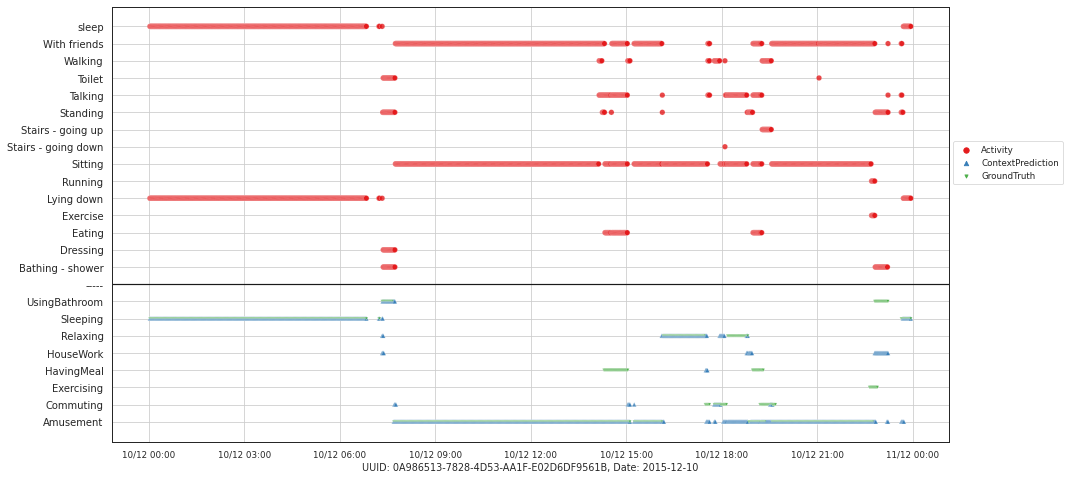

In [15]:
get_date_plot(df_all, sample_id, sample_date)

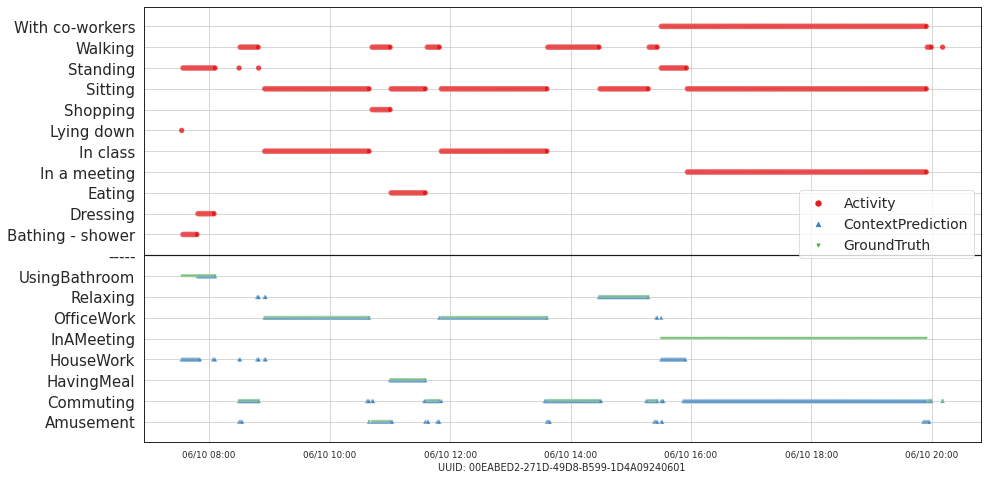

In [25]:
# # # 00EABED2-271D-49D8-B599-1D4A09240601_2015-10-06.png
get_date_plot(df_all, "00EABED2-271D-49D8-B599-1D4A09240601", "2015-10-06")

In [381]:
for row_idx, row in df_all[~df_all.gt_context.isnull()][['id','date']].drop_duplicates().iterrows():
    print(row_idx, row['id'],row['date'])
    get_date_plot(df_all, row['id'],str(row['date' ]))
    

24 00EABED2-271D-49D8-B599-1D4A09240601 2015-10-05
536 00EABED2-271D-49D8-B599-1D4A09240601 2015-10-06
1305 00EABED2-271D-49D8-B599-1D4A09240601 2015-10-08
1480 00EABED2-271D-49D8-B599-1D4A09240601 2015-10-09
2023 00EABED2-271D-49D8-B599-1D4A09240601 2015-10-12


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x7f5bbb10ee50> (for post_execute):


KeyboardInterrupt: 

In [382]:
sample_id, sample_date = '0A986513-7828-4D53-AA1F-E02D6DF9561B','2015-12-10'
df_sample_data = df_all[(df_all.date.astype(str)==sample_date) & (df_all.id==sample_id)].sort_values(by='timestamp')
# df_sample_data = df_sample_data[(df_sample_data['datetime']>=f'{sample_date} 06:00:00') & (df_sample_data['datetime']<=f'{sample_date} 12:00:00')]
# df_sample_data = df_sample_data[(df_sample_data['datetime']>='2015-11-30 07:00:00')]
df_sample_data

,timestamp,activities,id,gt_context,pred_context,combined_context,datetime,date
9476,1449734417,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,NaN,NaN,NaN,2015-12-10 00:00:17,2015-12-10
9477,1449734477,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,NaN,NaN,NaN,2015-12-10 00:01:17,2015-12-10
9478,1449734537,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,Sleeping,Sleeping,Sleeping,2015-12-10 00:02:17,2015-12-10
9479,1449734597,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,Sleeping,Sleeping,Sleeping,2015-12-10 00:03:17,2015-12-10
9480,1449734657,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,Sleeping,Sleeping,Sleeping,2015-12-10 00:04:17,2015-12-10
...,...,...,...,...,...,...,...,...
10873,1449820518,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,Sleeping,Sleeping,Sleeping,2015-12-10 23:55:18,2015-12-10
10874,1449820578,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,Sleeping,Sleeping,Sleeping,2015-12-10 23:56:18,2015-12-10
10875,1449820638,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,NaN,NaN,NaN,2015-12-10 23:57:18,2015-12-10
10876,1449820698,"Lying down,Sleeping",0A986513-7828-4D53-AA1F-E02D6DF9561B,NaN,NaN,NaN,2015-12-10 23:58:18,2015-12-10


In [383]:
df_sample_data['timestamp'].max() - df_sample_data['timestamp'].min()

86341

In [391]:
df_sample_data['ctx_grp'] = df_sample_data['pred_context'].ne(df_sample_data['pred_context'].shift()).cumsum()
df_context_times = df_sample_data.groupby(['pred_context','ctx_grp'],as_index=False).agg({'timestamp':['min','max']})
df_context_times.columns = ['context','ctx_grp','min_timestamp','max_timestamp']
df_context_times

,context,ctx_grp,min_timestamp,max_timestamp
0,Amusement,16,1449762418,1449788518
1,Amusement,18,1449789358,1449792358
2,Amusement,26,1449797638,1449797818
3,Amusement,32,1449799558,1449799738
4,Amusement,34,1449799858,1449801958
5,Amusement,39,1449802678,1449804618
6,Amusement,41,1449804978,1449816438
7,Amusement,69,1449819498,1449819618
8,"Amusement,Commuting",15,1449762298,1449762358
9,"Amusement,Commuting",17,1449788578,1449789298


In [404]:
df_gt = pd.read_csv('/home/prasoon/context_sensing/cache/feb2023/df_gt.csv')
df_gt  =df_gt[df_gt.id==sample_id]
df_gt.start_time = df_gt.start_time.astype(int)
df_gt.end_time = df_gt.end_time.astype(int)
df_gt['start_datetime'] = pd.to_datetime(df_gt['start_time'], unit='s')
df_gt['end_datetime'] = pd.to_datetime(df_gt['end_time'], unit='s')

df_gt.sort_values(by='start_time')

,id,task_url,start_time,end_time,context,total_time,st_time,ed_time,start_datetime,end_datetime
428,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449601855,1449603175,InAMeeting,1320.0,2015-12-08 19:10:55,2015-12-08 19:32:55,2015-12-08 19:10:55,2015-12-08 19:32:55
439,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449603235,1449604135,Commuting,900.0,2015-12-08 19:33:55,2015-12-08 19:48:55,2015-12-08 19:33:55,2015-12-08 19:48:55
434,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449603235,1449612415,Amusement,9180.0,2015-12-08 19:33:55,2015-12-08 22:06:55,2015-12-08 19:33:55,2015-12-08 22:06:55
429,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449604315,1449605395,HavingMeal,1080.0,2015-12-08 19:51:55,2015-12-08 20:09:55,2015-12-08 19:51:55,2015-12-08 20:09:55
435,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449612835,1449614335,Amusement,1500.0,2015-12-08 22:13:55,2015-12-08 22:38:55,2015-12-08 22:13:55,2015-12-08 22:38:55
432,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449612895,1449614215,Commuting,1320.0,2015-12-08 22:14:55,2015-12-08 22:36:55,2015-12-08 22:14:55,2015-12-08 22:36:55
440,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449615055,1449616360,Amusement,1305.0,2015-12-08 22:50:55,2015-12-08 23:12:40,2015-12-08 22:50:55,2015-12-08 23:12:40
430,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449615160,1449616240,HavingMeal,1080.0,2015-12-08 22:52:40,2015-12-08 23:10:40,2015-12-08 22:52:40,2015-12-08 23:10:40
438,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449616600,1449620680,Relaxing,4080.0,2015-12-08 23:16:40,2015-12-09 00:24:40,2015-12-08 23:16:40,2015-12-09 00:24:40
437,0A986513-7828-4D53-AA1F-E02D6DF9561B,dc6e6767-2015-12-08,1449620920,1449631480,Amusement,10560.0,2015-12-09 00:28:40,2015-12-09 03:24:40,2015-12-09 00:28:40,2015-12-09 03:24:40


In [393]:
df_ts = pd.DataFrame(np.arange(df_sample_data['timestamp'].min(), df_sample_data['timestamp'].max(),60), columns=['timestamp'])
df_ts = pd.merge(df_ts, df_sample_data[['timestamp','activities','pred_context']],on='timestamp',how='left')
# df_ts.activities = df_ts.activities.fillna(method='bfill',limit=2)
df_ts.activities = df_ts.activities.fillna('')
df_ts.pred_context = df_ts.pred_context.fillna(method='bfill',limit=5)
df_ts.pred_context = df_ts.pred_context.fillna(method='ffill',limit=5)
df_ts.pred_context = df_ts.pred_context.fillna('')
# df_ts['context'] = ''
df_ts['gt_context']=''
for row_idx, row in df_gt.iterrows():
    row_context = row['context']
    df_ts.loc[(df_ts.timestamp>=row['start_time']) & (df_ts.timestamp<row['end_time']),'gt_context'] = row_context
df_ts.head()    

,timestamp,activities,pred_context,gt_context
0,1449734417,"Lying down,Sleeping",Sleeping,
1,1449734477,"Lying down,Sleeping",Sleeping,
2,1449734537,"Lying down,Sleeping",Sleeping,Sleeping
3,1449734597,"Lying down,Sleeping",Sleeping,Sleeping
4,1449734657,"Lying down,Sleeping",Sleeping,Sleeping


In [394]:
df_ts.activities.unique()

array(['Lying down,Sleeping', ''], dtype=object)

In [388]:
all_activities = df_ts.activities.unique().tolist()
all_activities.sort(key=len)
all_activities

all_contexts = np.unique(np.concatenate([df_ts.pred_context.values, df_ts.gt_context.values])).tolist()
all_contexts.sort(key=len)
print(all_activities)
all_contexts

['', 'Lying down,Sleeping']


['',
 'Relaxing',
 'Sleeping',
 'Amusement',
 'Commuting',
 'Exercising',
 'UsingBathroom']

In [389]:
df_ts['datetime'] = pd.to_datetime(df_ts['timestamp'], unit='s').dt.tz_localize('UTC').dt.tz_convert('America/Los_Angeles').dt.tz_localize(None)
df_ts['activity_idx'] = df_ts.activities.apply(lambda x: all_activities.index(x))
df_ts['context_idx'] = df_ts.pred_context.apply(lambda x: all_contexts.index(x))
df_ts['gt_idx'] = df_ts.gt_context.apply(lambda x: all_contexts.index(x))
df_ts.head()

,timestamp,activities,pred_context,gt_context,datetime,activity_idx,context_idx,gt_idx
0,1449734417,"Lying down,Sleeping",Sleeping,,2015-12-10 00:00:17,1,2,0
1,1449734477,"Lying down,Sleeping",Sleeping,,2015-12-10 00:01:17,1,2,0
2,1449734537,"Lying down,Sleeping",Sleeping,Sleeping,2015-12-10 00:02:17,1,2,2
3,1449734597,"Lying down,Sleeping",Sleeping,Sleeping,2015-12-10 00:03:17,1,2,2
4,1449734657,"Lying down,Sleeping",Sleeping,Sleeping,2015-12-10 00:04:17,1,2,2


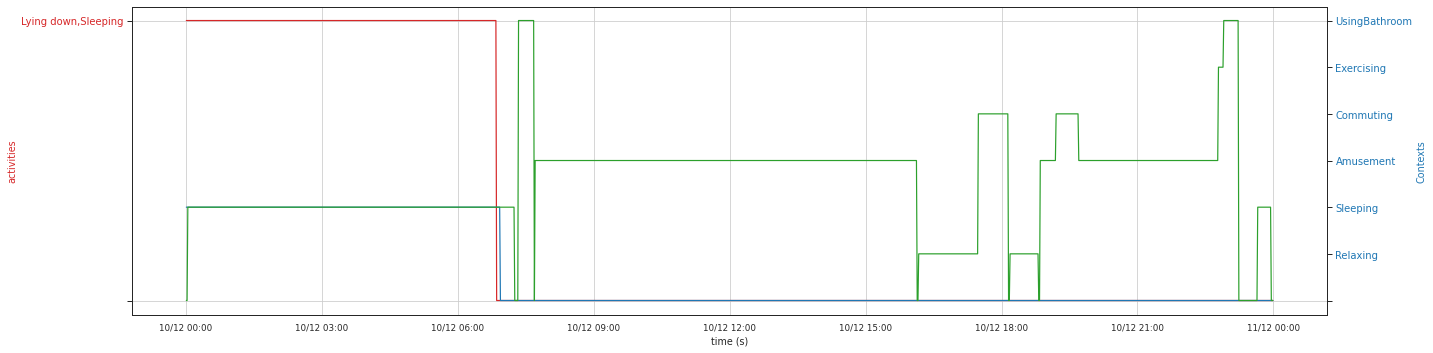

In [390]:
fig, ax1 = plt.subplots(1,1,figsize=(20,5))
ax1.xaxis.set_major_formatter(dates.DateFormatter("%d/%m %H:%M"))
color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('activities', color=color)
ax1.set_yticks(range(len(all_contexts + all_activities)))
ax1.set_yticklabels(['']*len(all_contexts) + all_activities,fontsize=10)
ax1.plot(df_ts['datetime'], df_ts['activity_idx'] + len(all_contexts), color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Contexts', color=color)
ax2.set_yticks(range(len(all_contexts)))
ax2.set_yticklabels(all_contexts,fontsize=10)
ax2.plot(df_ts['datetime'], df_ts['context_idx'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

color = 'tab:green'
ax2.plot(df_ts['datetime'], df_ts['gt_idx'], color=color)
# ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()